In [2]:
import tensorflow as tf
import numpy as np
import numpy.polynomial.polynomial as poly

from random import randint

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
tf.reset_default_graph()
num_neurons = 100

### Defining the connections for each neuron

In [43]:
connections = []

for i in range(num_neurons):
    temp = []
    for j in range(num_neurons):
        if i != j:
            number = randint(0, 99)
            if number < 5:
                temp.append(j)
    connections.append(tf.Variable(np.asarray(temp), dtype=tf.int32))

### Initial values for each neuron (step: t)

In [44]:
neuron_values = tf.Variable(np.ones(num_neurons), dtype=tf.float32)

### Calculating the fIs from synaptic connections. TODO: Have to check whether neuron has fired

In [45]:
mul_product = []

for i in range(num_neurons):
    gather = tf.gather(neuron_values, connections[i])
    mul_product.append(tf.reduce_sum(gather))

### Adding back the synaptic current to initial neuron value to get the neuron value at next time iteration. (step: t+1)

In [46]:
mul_plus_add = tf.add(tf.stack(mul_product, 0), neuron_values)

In [47]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [48]:
%%time
output = sess.run(mul_plus_add)

CPU times: user 20.4 ms, sys: 4.06 ms, total: 24.4 ms
Wall time: 23.4 ms


In [13]:
x_local_mul = [10, 100, 1000, 2000, 3000, 5000, 10000, 20000]
y_local_mul = [2.6, 24.9, 215, 466, 693, 1270, 5240, 12700]

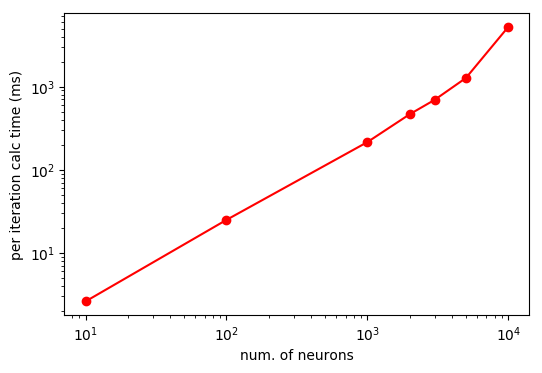

In [72]:
fig = plt.figure()

plt.xscale('log')
plt.yscale('log')

ax1 = fig.add_subplot(111)
ax1.plot(x_local_mul, y_local_mul, 'ro-')

ax1.set_xlabel('num. of neurons')
ax1.set_ylabel('per iteration calc time (ms)')

# coefs = poly.polyfit(x_local_mul, y_local_mul, 4)
# x_new = [10, 100, 1000, 10000, 100000, 1000000]
# ffit = poly.polyval(x_new, coefs)
# plt.plot(x_new, ffit, 'r--')

plt.draw()